In [14]:
import pandas

dataset = pandas.read_csv("./SA_heart.csv")

# Removendo a coluna de identificação e transformando a coluna famhist para numérica
clear_dataset = pandas.get_dummies(dataset, drop_first=True)
clear_dataset = clear_dataset.drop(columns=['id'])

#print(clear_dataset.head(10))
print(clear_dataset.describe())

              sbp     tobacco         ldl   adiposity       typea     obesity  \
count  462.000000  462.000000  462.000000  462.000000  462.000000  462.000000   
mean   138.326840    3.635649    4.740325   25.406732   53.103896   26.044113   
std     20.496317    4.593024    2.070909    7.780699    9.817534    4.213680   
min    101.000000    0.000000    0.980000    6.740000   13.000000   14.700000   
25%    124.000000    0.052500    3.282500   19.775000   47.000000   22.985000   
50%    134.000000    2.000000    4.340000   26.115000   53.000000   25.805000   
75%    148.000000    5.500000    5.790000   31.227500   60.000000   28.497500   
max    218.000000   31.200000   15.330000   42.490000   78.000000   46.580000   

          alcohol         age         chd  famhist_Present  
count  462.000000  462.000000  462.000000       462.000000  
mean    17.044394   42.816017    0.346320         0.415584  
std     24.481059   14.608956    0.476313         0.493357  
min      0.000000   15.000

# 1. Análise inicial dos dados: média e desvio padrão de cada variavel

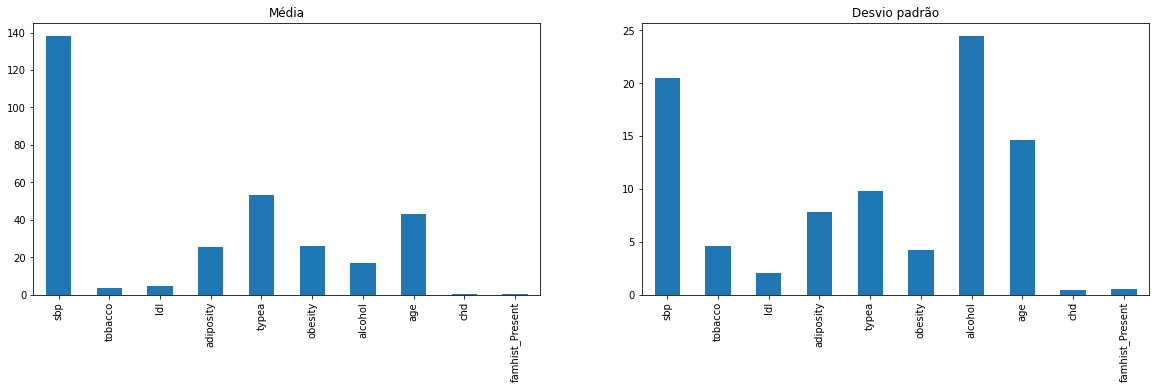

In [15]:
import matplotlib.pyplot as plt

plt.close("all")

figure, (graph11, graph12) = plt.subplots(1, 2)
graph11 = clear_dataset.describe().loc['mean'].plot.bar(title='Média', ax=graph11)
graph12 = clear_dataset.describe().loc['std'].plot.bar(title='Desvio padrão', ax=graph12)

figure.set_figheight(5)
figure.set_figwidth(20)
plt.show()


# 2. 

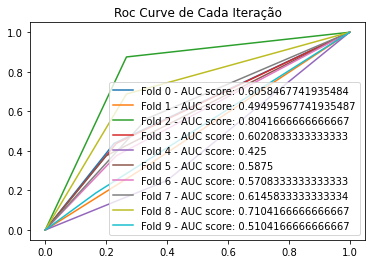

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay

# Separando as variaveis e os resultados
X = clear_dataset.drop('chd', axis=1).values
Y = clear_dataset['chd'].values

# Modelo CART 
decisionTree = DecisionTreeClassifier()

KFolds = StratifiedKFold(n_splits=10)

legends = []
scores = []
confusion_matrixes = []
i = 0

for train, test in KFolds.split(X, Y):
    X_train, X_test, Y_train, Y_test = X[train], X[test], Y[train], Y[test]
    decisionTree.fit(X_train, Y_train)
    y_pred_prob = decisionTree.predict_proba(X_test)[:, 1]
    y_pred = decisionTree.predict(X_test)
    confusion_matrixes.append(confusion_matrix(Y_test, y_pred))
    auc_score = roc_auc_score(Y_test, y_pred_prob)
    scores.append(auc_score)
    legends.append(f'Fold {i} - AUC score: {auc_score}')
    fpr, tpr, threshold = roc_curve(Y_test, y_pred_prob)
    plt.plot(fpr, tpr)
    i += 1

plt.title('Roc Curve de Cada Iteração')
plt.legend(legends)